## Problem statement : https://datahack.analyticsvidhya.com/contest/practice-problem-age-detection/#ProblemStatement

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plot
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
from keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 3
model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet',pooling='avg'))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False

2022-10-09 14:05:01.990392: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-09 14:05:01.990927: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-09 14:05:01.997852: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [51]:
ImageDataGenerator?

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

#datagen = ImageDataGenerator(preprocess_input,validation_split=0.2)
datagen =  ImageDataGenerator(preprocess_input,validation_split=0.2,width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
image_size = 224
train_generator = datagen.flow_from_directory(
    '../../datasets/age-detector/train/train/',
    target_size=(image_size, image_size),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=100,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '../../datasets/age-detector/train/train/',
    target_size=(image_size, image_size),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)



history = model.fit_generator(train_generator, epochs=1, validation_data=val_generator,validation_steps=1)


Found 15926 images belonging to 3 classes.
Found 3980 images belonging to 3 classes.


/home/kiran/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/home/kiran/anaconda3/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


160/160 [==============================] - 951s 6s/step - loss: 0.7254 - categorical_accuracy: 0.6842 - val_loss: 0.5150 - val_categorical_accuracy: 0.7812


In [54]:
test_generator = datagen.flow_from_directory(
    '../../datasets/age-detector/test/',
    target_size=(image_size, image_size),
    color_mode='rgb',
    classes=['test'],
    class_mode=None,
    shuffle=False
)

Found 6636 images belonging to 1 classes.


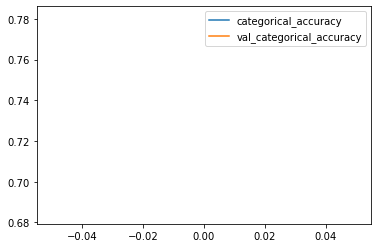

In [55]:
plot.plot(history.history['categorical_accuracy'])
plot.plot(history.history['val_categorical_accuracy'])
plot.legend(['categorical_accuracy','val_categorical_accuracy'])

In [56]:
pred = model.predict_generator(test_generator,verbose = 1)

/home/kiran/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


208/208 [==============================] - 388s 2s/step


In [65]:
pred.shape

(6636, 3)

In [66]:
import numpy as np

In [67]:
fn = test_generator.filenames

In [68]:
fn

['test/10.jpg',
 'test/1000.jpg',
 'test/10002.jpg',
 'test/10003.jpg',
 'test/10005.jpg',
 'test/10006.jpg',
 'test/1001.jpg',
 'test/10010.jpg',
 'test/10012.jpg',
 'test/10014.jpg',
 'test/10020.jpg',
 'test/10022.jpg',
 'test/10024.jpg',
 'test/10029.jpg',
 'test/10032.jpg',
 'test/10033.jpg',
 'test/10037.jpg',
 'test/10039.jpg',
 'test/10042.jpg',
 'test/10044.jpg',
 'test/10049.jpg',
 'test/10052.jpg',
 'test/10054.jpg',
 'test/10060.jpg',
 'test/10064.jpg',
 'test/10066.jpg',
 'test/10072.jpg',
 'test/10074.jpg',
 'test/10075.jpg',
 'test/10077.jpg',
 'test/10083.jpg',
 'test/10089.jpg',
 'test/10090.jpg',
 'test/10094.jpg',
 'test/10102.jpg',
 'test/10106.jpg',
 'test/1011.jpg',
 'test/10113.jpg',
 'test/10114.jpg',
 'test/10115.jpg',
 'test/10121.jpg',
 'test/10124.jpg',
 'test/10128.jpg',
 'test/10129.jpg',
 'test/10136.jpg',
 'test/10138.jpg',
 'test/10142.jpg',
 'test/10144.jpg',
 'test/10148.jpg',
 'test/10151.jpg',
 'test/10154.jpg',
 'test/10155.jpg',
 'test/10158.jpg',

In [69]:
rep1 = [s.replace('test/','') for s in fn]
# rep2 = rep1 = [s.replace('.jpg', '') for s in rep1]
#res = [eval(i) for i in rep1]

In [70]:
rep1

['10.jpg',
 '1000.jpg',
 '10002.jpg',
 '10003.jpg',
 '10005.jpg',
 '10006.jpg',
 '1001.jpg',
 '10010.jpg',
 '10012.jpg',
 '10014.jpg',
 '10020.jpg',
 '10022.jpg',
 '10024.jpg',
 '10029.jpg',
 '10032.jpg',
 '10033.jpg',
 '10037.jpg',
 '10039.jpg',
 '10042.jpg',
 '10044.jpg',
 '10049.jpg',
 '10052.jpg',
 '10054.jpg',
 '10060.jpg',
 '10064.jpg',
 '10066.jpg',
 '10072.jpg',
 '10074.jpg',
 '10075.jpg',
 '10077.jpg',
 '10083.jpg',
 '10089.jpg',
 '10090.jpg',
 '10094.jpg',
 '10102.jpg',
 '10106.jpg',
 '1011.jpg',
 '10113.jpg',
 '10114.jpg',
 '10115.jpg',
 '10121.jpg',
 '10124.jpg',
 '10128.jpg',
 '10129.jpg',
 '10136.jpg',
 '10138.jpg',
 '10142.jpg',
 '10144.jpg',
 '10148.jpg',
 '10151.jpg',
 '10154.jpg',
 '10155.jpg',
 '10158.jpg',
 '10162.jpg',
 '10163.jpg',
 '10170.jpg',
 '10180.jpg',
 '10186.jpg',
 '1019.jpg',
 '10194.jpg',
 '10208.jpg',
 '10218.jpg',
 '10223.jpg',
 '10227.jpg',
 '10228.jpg',
 '1023.jpg',
 '10230.jpg',
 '10233.jpg',
 '10234.jpg',
 '10238.jpg',
 '1024.jpg',
 '10241.jpg',
 

In [71]:
np.array(rep1)

array(['10.jpg', '1000.jpg', '10002.jpg', ..., '9993.jpg', '9995.jpg',
       '9996.jpg'], dtype='<U9')

In [72]:
len(res)

6636

In [73]:
mapping = train_generator.class_indices

In [74]:
mapping

{'MIDDLE': 0, 'OLD': 1, 'YOUNG': 2}

In [75]:
label_dict = {}
label_dict[0] = 'MIDDLE'
label_dict[1] = 'OLD'
label_dict[2] = 'YOUNG'

In [76]:
pred

array([[0.7530525 , 0.20049715, 0.04645032],
       [0.27260435, 0.5798813 , 0.1475143 ],
       [0.88775665, 0.06175294, 0.05049037],
       ...,
       [0.9443936 , 0.01092312, 0.04468333],
       [0.9317935 , 0.04643562, 0.02177093],
       [0.33777326, 0.04905923, 0.6131676 ]], dtype=float32)

In [77]:
pred[:,1]

array([0.20049715, 0.5798813 , 0.06175294, ..., 0.01092312, 0.04643562,
       0.04905923], dtype=float32)

In [78]:
np.max(pred)

0.99343914

In [79]:
import numpy as np
predict = np.argmax(pred, axis = 1)
predict

array([0, 1, 0, ..., 0, 0, 2])

In [80]:
pred_label =np.array([label_dict[i] for i in predict])

In [81]:
pred_label

array(['MIDDLE', 'OLD', 'MIDDLE', ..., 'MIDDLE', 'MIDDLE', 'YOUNG'],
      dtype='<U6')

In [82]:
output = pd.DataFrame()
output['Class'] = pred_label
output['ID'] = np.array(rep1)

In [83]:
output.to_csv("age-finder.csv",header=True,index=False)